In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tse_df = pd.read_csv(
    'C:\\Users\\ADMIN\AppData\Roaming\MetaQuotes\Terminal\\2506E8E7E4116548D478CE2C3598FAB1\MQL5\Files\shakhS kl6-D1.prn')
tse_df

,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20081205,0,9249.00,9249.00,9249.00,9249.00,37
1,20081206,0,9249.00,9249.00,9168.00,9168.00,37
2,20081207,0,9178.00,9178.00,9130.00,9130.00,37
3,20081208,0,9130.00,9130.00,9080.00,9080.00,37
4,20081210,0,9089.00,9089.00,9032.00,9032.00,37
...,...,...,...,...,...,...,...
3395,20230122,0,1657576.63,1662845.13,1649055.88,1652923.00,46
3396,20230123,0,1652924.50,1667863.75,1652924.50,1654163.00,47
3397,20230124,0,1653948.63,1654390.50,1646110.75,1646110.75,39
3398,20230125,0,1646053.50,1646053.50,1612494.50,1612494.50,31


In [3]:
date=tse_df['<DTYYYYMMDD>']
vol=tse_df['<VOL>']
tse_df.drop(['<DTYYYYMMDD>','<TIME>','<VOL>'],axis=1,inplace=True)
col=tse_df.columns
tse_df.rename(columns={'<OPEN>':'open','<HIGH>':'high','<LOW>':'low','<CLOSE>':'close'},inplace=True)
tse_df

,open,high,low,close
0,9249.00,9249.00,9249.00,9249.00
1,9249.00,9249.00,9168.00,9168.00
2,9178.00,9178.00,9130.00,9130.00
3,9130.00,9130.00,9080.00,9080.00
4,9089.00,9089.00,9032.00,9032.00
...,...,...,...,...
3395,1657576.63,1662845.13,1649055.88,1652923.00
3396,1652924.50,1667863.75,1652924.50,1654163.00
3397,1653948.63,1654390.50,1646110.75,1646110.75
3398,1646053.50,1646053.50,1612494.50,1612494.50


In [4]:
date

0       20081205
1       20081206
2       20081207
3       20081208
4       20081210
          ...   
3395    20230122
3396    20230123
3397    20230124
3398    20230125
3399    20230128
Name: <DTYYYYMMDD>, Length: 3400, dtype: int64

In [5]:
mapper={i:f'{i}_return_1d' for i in tse_df.columns}

In [6]:
mapper

{'open': 'open_return_1d',
 'high': 'high_return_1d',
 'low': 'low_return_1d',
 'close': 'close_return_1d'}

In [7]:
data_exp={f'{mapper[i]}':[1] for i in mapper.keys()}
data_exp

{'open_return_1d': [1],
 'high_return_1d': [1],
 'low_return_1d': [1],
 'close_return_1d': [1]}

In [8]:
for i in tse_df.columns:
    for j in tse_df.index[1:]:
        data_exp[mapper[i]].append(tse_df[i][j]/tse_df[i][j-1])

In [9]:
data_exp

{'open_return_1d': [1,
  1.0,
  0.9923234944318304,
  0.9947701024188277,
  0.9955093099671413,
  0.9928484981846187,
  0.9943484042553191,
  0.9926446004680709,
  0.998203660042663,
  0.9975255876729276,
  0.9986469726011952,
  0.999435474765722,
  0.9977406235878897,
  0.9967164855072463,
  0.999204816539816,
  0.9989768076398363,
  0.9966996699669967,
  0.9964603790819822,
  0.9963332187464191,
  0.99551466359977,
  0.9983826247689463,
  0.9974542929877344,
  0.997215777262181,
  0.9976733364355514,
  0.996035447761194,
  0.9973074221493795,
  0.9935438431740815,
  0.9991729678638941,
  1.000118245240629,
  1.0002364625206905,
  1.0008274231678487,
  1.0035431675918272,
  1.0020007061315759,
  1.004698144233028,
  0.9959083469721768,
  0.9985913839652542,
  1.0002351005054662,
  0.9996474321306852,
  1.000235128144839,
  0.998119417019276,
  1.0004710315591145,
  0.998469868173258,
  0.9979959919839679,
  0.9982282069454288,
  0.998461720506449,
  0.9983408390613889,
  1.00071225071

In [10]:
data2=pd.DataFrame(data_exp)
data2

,open_return_1d,high_return_1d,low_return_1d,close_return_1d
0,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,0.991242,0.991242
2,0.992323,0.992323,0.995855,0.995855
3,0.994770,0.994770,0.994524,0.994524
4,0.995509,0.995509,0.994714,0.994714
...,...,...,...,...
3395,0.981312,0.984431,0.994859,0.997192
3396,0.997193,1.003018,1.002346,1.000750
3397,1.000620,0.991922,0.995878,0.995132
3398,0.995226,0.994961,0.979578,0.979578


In [11]:
def mean_exp(data_in):
    p = 1
    n = 0
    for i in data_in:
        if i != 0:
            p*=i
            n+=1
    return p**(1/n)

In [12]:
mean_col={}
for i in tse_df.columns:
    mean_col[f'{i}']=mean_exp(data2[f'{i}_return_1d'])

In [13]:
mean_col

{'open': 1.0015190019622155,
 'high': 1.00151913158579,
 'low': 1.0015169275292763,
 'close': 1.0015169275292763}

In [14]:
expected_data={}
for i in tse_df.columns:
    expected_data[f'exp_{i}']=[]
    for j in tse_df.index:
        expected_data[f'exp_{i}'].append(tse_df[i][0]*mean_col[i]**j)



In [15]:
expected_data=pd.DataFrame(expected_data)
expected_data

,exp_open,exp_high,exp_low,exp_close
0,9.249000e+03,9.249000e+03,9.249000e+03,9.249000e+03
1,9.263049e+03,9.263050e+03,9.263030e+03,9.263030e+03
2,9.277120e+03,9.277122e+03,9.277081e+03,9.277081e+03
3,9.291212e+03,9.291215e+03,9.291154e+03,9.291154e+03
4,9.305325e+03,9.305330e+03,9.305248e+03,9.305248e+03
...,...,...,...,...
3395,1.599769e+06,1.600472e+06,1.588559e+06,1.588559e+06
3396,1.602199e+06,1.602903e+06,1.590968e+06,1.590968e+06
3397,1.604632e+06,1.605338e+06,1.593382e+06,1.593382e+06
3398,1.607070e+06,1.607777e+06,1.595799e+06,1.595799e+06


In [16]:
final_data=pd.concat([date,expected_data],axis=1)
final_data

,<DTYYYYMMDD>,exp_open,exp_high,exp_low,exp_close
0,20081205,9.249000e+03,9.249000e+03,9.249000e+03,9.249000e+03
1,20081206,9.263049e+03,9.263050e+03,9.263030e+03,9.263030e+03
2,20081207,9.277120e+03,9.277122e+03,9.277081e+03,9.277081e+03
3,20081208,9.291212e+03,9.291215e+03,9.291154e+03,9.291154e+03
4,20081210,9.305325e+03,9.305330e+03,9.305248e+03,9.305248e+03
...,...,...,...,...,...
3395,20230122,1.599769e+06,1.600472e+06,1.588559e+06,1.588559e+06
3396,20230123,1.602199e+06,1.602903e+06,1.590968e+06,1.590968e+06
3397,20230124,1.604632e+06,1.605338e+06,1.593382e+06,1.593382e+06
3398,20230125,1.607070e+06,1.607777e+06,1.595799e+06,1.595799e+06


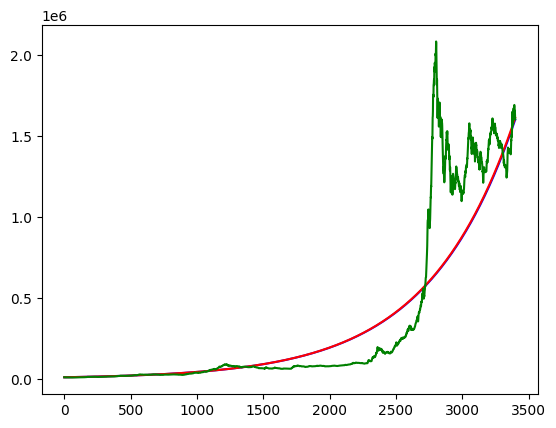

In [17]:
plt.plot(final_data.exp_close,c='blue')
plt.plot(final_data.exp_open,c='red')
plt.plot(tse_df.close,c='green')

In [19]:
tse_df

,open,high,low,close
0,9249.00,9249.00,9249.00,9249.00
1,9249.00,9249.00,9168.00,9168.00
2,9178.00,9178.00,9130.00,9130.00
3,9130.00,9130.00,9080.00,9080.00
4,9089.00,9089.00,9032.00,9032.00
...,...,...,...,...
3395,1657576.63,1662845.13,1649055.88,1652923.00
3396,1652924.50,1667863.75,1652924.50,1654163.00
3397,1653948.63,1654390.50,1646110.75,1646110.75
3398,1646053.50,1646053.50,1612494.50,1612494.50


In [20]:
expected_data

,exp_open,exp_high,exp_low,exp_close
0,9.249000e+03,9.249000e+03,9.249000e+03,9.249000e+03
1,9.263049e+03,9.263050e+03,9.263030e+03,9.263030e+03
2,9.277120e+03,9.277122e+03,9.277081e+03,9.277081e+03
3,9.291212e+03,9.291215e+03,9.291154e+03,9.291154e+03
4,9.305325e+03,9.305330e+03,9.305248e+03,9.305248e+03
...,...,...,...,...
3395,1.599769e+06,1.600472e+06,1.588559e+06,1.588559e+06
3396,1.602199e+06,1.602903e+06,1.590968e+06,1.590968e+06
3397,1.604632e+06,1.605338e+06,1.593382e+06,1.593382e+06
3398,1.607070e+06,1.607777e+06,1.595799e+06,1.595799e+06


In [21]:
final_data2=tse_df.values/expected_data.values
final_data2=pd.DataFrame(final_data2)
final_data2

,0,1,2,3
0,1.000000,1.000000,1.000000,1.000000
1,0.998483,0.998483,0.989741,0.989741
2,0.989316,0.989315,0.984146,0.984146
3,0.982649,0.982649,0.977274,0.977274
4,0.976753,0.976752,0.970635,0.970635
...,...,...,...,...
3395,1.036135,1.038972,1.038083,1.040518
3396,1.031660,1.040527,1.038942,1.039721
3397,1.030734,1.030556,1.033093,1.033093
3398,1.024258,1.023807,1.010462,1.010462


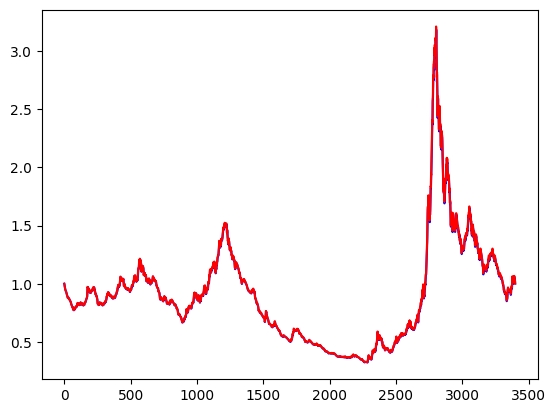

In [22]:
plt.plot(final_data2[0],c='blue')
plt.plot(final_data2[3],c='red')

In [79]:
col

Index(['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>'], dtype='object')

In [80]:
for_export_data=pd.concat([date,final_data2,vol],axis=1)
for_export_data.rename(columns={0:'<OPEN>',1:'<HIGH>',2:'<LOW>',3:'<CLOSE>'},inplace=True)
for_export_data

,<DTYYYYMMDD>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20081205,1.000000,1.000000,1.000000,1.000000,37
1,20081206,0.998480,0.998480,0.989738,0.989738,37
2,20081207,0.989309,0.989309,0.984139,0.984139,37
3,20081208,0.982638,0.982638,0.977264,0.977264,37
4,20081210,0.976738,0.976738,0.970622,0.970622,37
...,...,...,...,...,...,...
3379,20221231,1.042277,1.042277,1.014574,1.014375,22
3380,20230101,1.004797,1.005644,0.995928,0.995920,21
3381,20230102,0.986787,1.005073,0.994597,1.012779,49
3382,20230103,1.003501,1.009436,1.010233,1.010035,49


In [87]:
file=open('C:\\Users\ADMIN\Desktop\\tse\\real_expected.prn','a')
file.write('<DTYYYYMMDD>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>')
file.write('\n')
for i in for_export_data.index:
    for j in for_export_data.columns:
        if j != for_export_data.columns[-1]:
            file.write(str(for_export_data[j][i]))
            file.write(',')
        else:
            file.write(str(for_export_data[j][i]))
    file.write('\n')
file.close()



In [83]:
#for_export_data.to_csv('C:\\Users\ADMIN\Desktop\\tse\\real_expected.prn')